In [2]:
from lib.pipeline import Pipeline
import os
import numpy as np
import tifffile as tiff
from scipy.ndimage import affine_transform
import matplotlib.pyplot as plt
from lib.CZIManager import extract_tiff_from_czi,CZIManager
from tifffile import imsave


In [33]:
file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/czi/DK73_slide074_2022_03_07_axion2.czi'
out = '/home/zhw272/Desktop/test.tif'
extract_tiff_from_czi(file,out,scale = 0.03125,scenei=1)

In [42]:
out

'/home/zhw272/Desktop/test.tif'

In [41]:
czi = CZIManager(file)
data = czi.get_scene(scale=0.001, scene_index=1, channel=1)
imsave(out, data)


In [34]:
file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/czi/DK73_slide046_2022_03_01_axion2.czi'

In [37]:
extract_tiff_from_czi(file,out,scale = 0.03125,scenei=2)


In [22]:
czi = CZIManager(file)
data = czi.get_scene(scale=0.01, scene_index=2, channel=2)

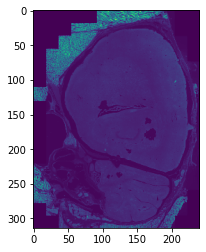

In [36]:
plt.imshow(data)

In [21]:
def align_image(INPUT,file):
    infile = os.path.join(INPUT, file)
    T = transforms[file]
    image = tiff.imread(infile)
    matrix = T[:2,:2]
    offset = T[:2,2]
    offset = np.flip(offset)
    image1 = affine_transform(image,matrix.T,offset)
    return image,image1,T

In [30]:
def show_aligned_image(id):
    file=f'{id}.tif'
    INPUT = fileLocationManager.get_thumbnail_cleaned(channel)
    image,image1,T = align_image(INPUT,file)
    INPUT = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_aligned_extra_pad'
    imagep,imagep1,T = align_image(INPUT,file)
    plt.figure(figsize = [10,10])
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.subplot(2,2,2)
    plt.imshow(image1)
    plt.subplot(2,2,3)
    plt.imshow(imagep)
    plt.subplot(2,2,4)
    plt.imshow(imagep1)



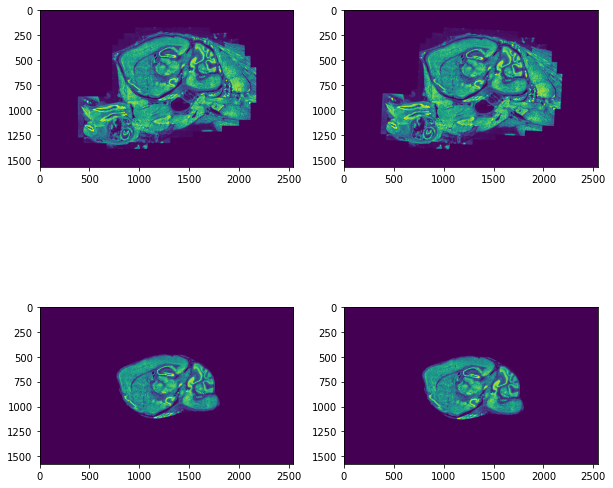

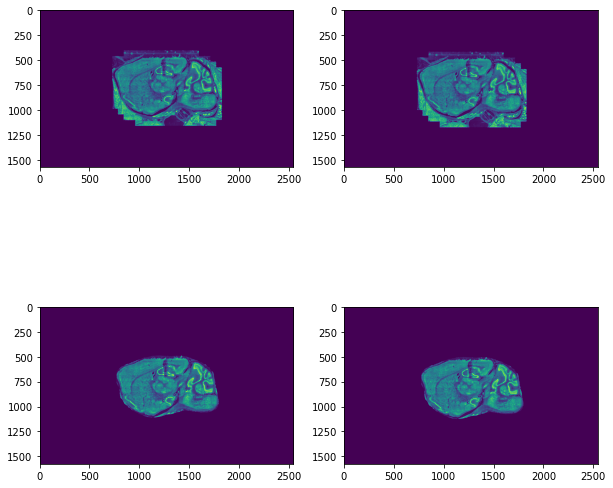

In [31]:
show_aligned_image(115)
show_aligned_image(114)

In [7]:
pip = Pipeline(animal='DK73')
sections = pip.sqlController.get_sections(pip.animal,pip.channel)
rotations_per_section = [pip.get_section_rotation(i) for i in sections]
len(rotations_per_section)

Check programs took 0.0 seconds


216